In [ ]:
# 使用Python中的gzip和shutil模块来解压这些文件
import gzip
import shutil
import os

files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"
]

for file in files:
    with gzip.open(file, 'rb') as f_in:
        with open(file[:-3], 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)


Epoch 1/10


d:\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7751 - loss: 0.6268 - val_accuracy: 0.8644 - val_loss: 0.3680
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8826 - loss: 0.3155 - val_accuracy: 0.8919 - val_loss: 0.3023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9045 - loss: 0.2586 - val_accuracy: 0.8953 - val_loss: 0.2780
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9170 - loss: 0.2234 - val_accuracy: 0.9069 - val_loss: 0.2581
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9281 - loss: 0.1965 - val_accuracy: 0.9003 - val_loss: 0.2656
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9378 - loss: 0.1677 - val_accuracy: 0.9079 - val_loss: 0.2636
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9410 - loss: 0.1548 - val_accuracy: 0.9078 - val_loss: 0.2669
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9499 - loss: 0.1334 - val_accu

C:\Users\61477\AppData\Local\Temp\ipykernel_1484\1095666792.py:52: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from current font.
  plt.tight_layout()
C:\Users\61477\AppData\Local\Temp\ipykernel_1484\1095666792.py:52: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  plt.tight_layout()
C:\Users\61477\AppData\Local\Temp\ipykernel_1484\1095666792.py:52: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  plt.tight_layout()
C:\Users\61477\AppData\Local\Temp\ipykernel_1484\1095666792.py:52: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  plt.tight_layout()
C:\Users\61477\AppData\Local\Temp\ipykernel_1484\1095666792.py:52: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
C:\Users\61477\AppData\Local\Temp\ipykernel_1484\1095666792.py:52: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing fr

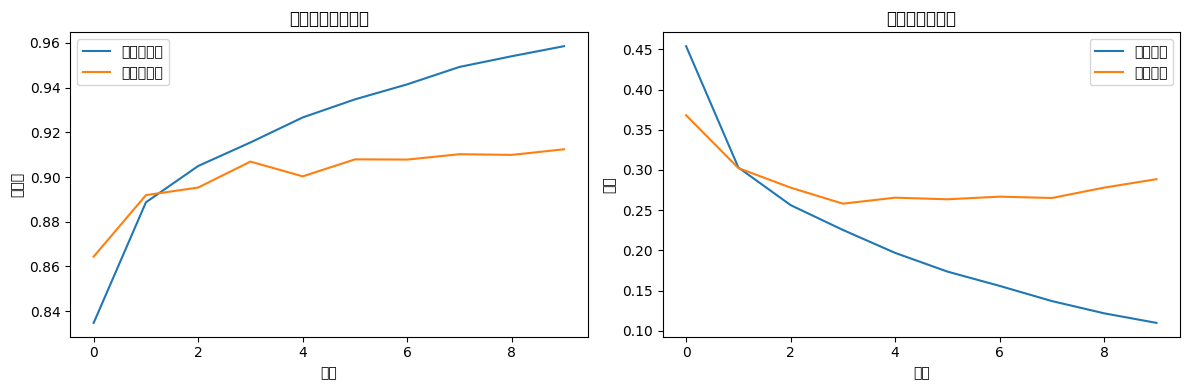

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 使用 TensorFlow 加载 Fashion MNIST 数据集
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# 数据预处理
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0  # 将训练图像缩放到 [0, 1] 之间
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

# 构建 CNN 模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 个类别
])

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型并保存训练历史
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))




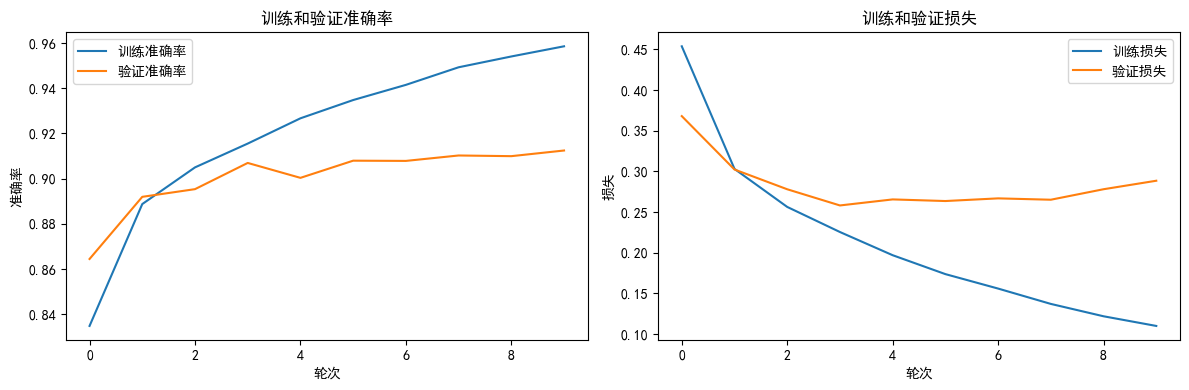

In [11]:
# 可视化训练过程
# 绘制训练和验证的准确率变化
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.legend()
plt.title('训练和验证准确率')

# 绘制训练和验证的损失变化
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('轮次')
plt.ylabel('损失')
plt.legend()
plt.title('训练和验证损失')

plt.tight_layout()
plt.show()

In [12]:
# 保存完整的模型，包括架构、权重和优化器状态
model.save('fashion_model.h5')
